In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from statannotations.Annotator import Annotator

In [2]:
cartography_df = pd.read_csv('./sem-eval-sadness-cartography.csv', index_col=0)
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,agreement_factor,confidence,variability,correctness,is_correct,agreement_factor_rd
0,1423360081,When tears r inappropriate: 'This day is holy ...,0.490379,0.419222,0.061824,0.509621,0.419222,0.938176,1,1,0.250,0.509621,0.419222,1.0,True,0.5
1,1423360082,Hell hath no fury like a bureaucrat scorned. ―...,0.853199,0.140620,0.983384,0.146801,0.140620,0.016616,0,0,0.000,0.853199,0.140620,1.0,True,1.0
2,1423360083,People’s deepest passions often scare them too...,0.578820,0.250167,0.863592,0.421180,0.250167,0.136408,0,0,0.000,0.578820,0.250167,0.8,True,1.0
3,1423360086,@tomsteinfort expected i thought #fear,0.684062,0.152316,0.849072,0.315938,0.152316,0.150929,1,0,0.375,0.315938,0.152316,0.2,False,0.5
4,1423360087,Every day I dread doing an 8 hour shift in ret...,0.159083,0.135852,0.009577,0.840917,0.135853,0.990423,1,1,0.375,0.840917,0.135853,1.0,True,0.5


In [3]:
cartography_df['agreement_factor'] = cartography_df.apply(lambda row: row.agreement_factor if row.label == 1 else 1 - row.agreement_factor, axis=1)
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,agreement_factor,confidence,variability,correctness,is_correct,agreement_factor_rd
0,1423360081,When tears r inappropriate: 'This day is holy ...,0.490379,0.419222,0.061824,0.509621,0.419222,0.938176,1,1,0.250,0.509621,0.419222,1.0,True,0.5
1,1423360082,Hell hath no fury like a bureaucrat scorned. ―...,0.853199,0.140620,0.983384,0.146801,0.140620,0.016616,0,0,1.000,0.853199,0.140620,1.0,True,1.0
2,1423360083,People’s deepest passions often scare them too...,0.578820,0.250167,0.863592,0.421180,0.250167,0.136408,0,0,1.000,0.578820,0.250167,0.8,True,1.0
3,1423360086,@tomsteinfort expected i thought #fear,0.684062,0.152316,0.849072,0.315938,0.152316,0.150929,1,0,0.375,0.315938,0.152316,0.2,False,0.5
4,1423360087,Every day I dread doing an 8 hour shift in ret...,0.159083,0.135852,0.009577,0.840917,0.135853,0.990423,1,1,0.375,0.840917,0.135853,1.0,True,0.5


In [4]:
len(cartography_df['text_id'].unique())

6282

In [5]:
len(cartography_df)

6282

In [6]:
len(cartography_df)

6282

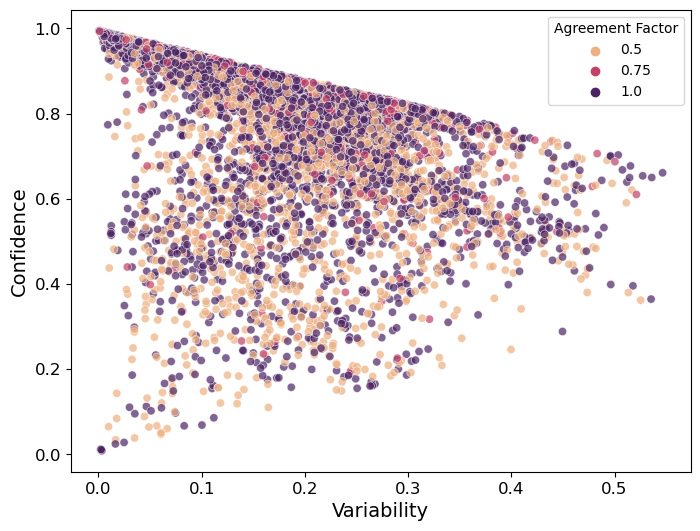

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='agreement_factor_rd', palette='flare', alpha=0.7)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/conf_vs_var_color_agreement_factor.png", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.5 vs. 0.75: Mann-Whitney-Wilcoxon test two-sided, P_val:5.237e-90 U_stat=3.116e+05
0.75 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.784e-16 U_stat=1.478e+06
0.5 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:4.491e-86 U_stat=2.420e+06


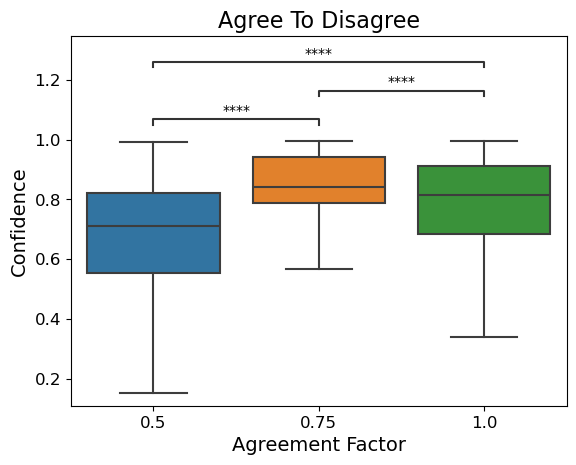

In [8]:
ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", showfliers=False)

pairs=[(0.5, 0.75), (0.75, 1.0), (0.5, 1.0)]

annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/agr_factor_vs_conf.png", dpi=600, bbox_inches='tight')


In [9]:
cartography_df['label_text'] = cartography_df['label'].map({0: 'not sadness', 1: 'sadness'})

In [10]:
len(cartography_df)

6282

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.5_sadness vs. 0.75_sadness: Mann-Whitney-Wilcoxon test two-sided, P_val:5.237e-90 U_stat=3.116e+05
0.75_sadness vs. 1.0_sadness: Mann-Whitney-Wilcoxon test two-sided, P_val:1.355e-18 U_stat=1.271e+05
0.5_sadness vs. 1.0_sadness: Mann-Whitney-Wilcoxon test two-sided, P_val:2.117e-146 U_stat=1.418e+05


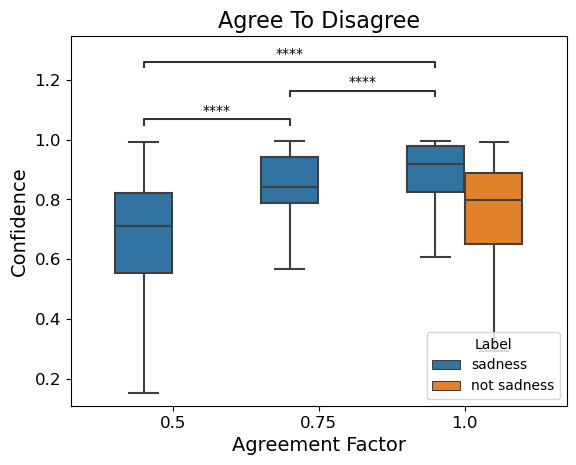

In [13]:
ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", showfliers=False, hue='label_text')


pairs=[ ((0.5, 'sadness'), (0.75, 'sadness')), ((0.75, 'sadness'), (1.0, 'sadness')), ((0.5, 'sadness'), (1.0, 'sadness'))]


annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence", hue='label_text')
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title = 'Label', loc='lower right')
plt.savefig("./plots/agr_factor_vs_conf_hue.png", dpi=600, bbox_inches='tight')

In [14]:
cartography_df['label'].value_counts()

1    3141
0    3141
Name: label, dtype: int64

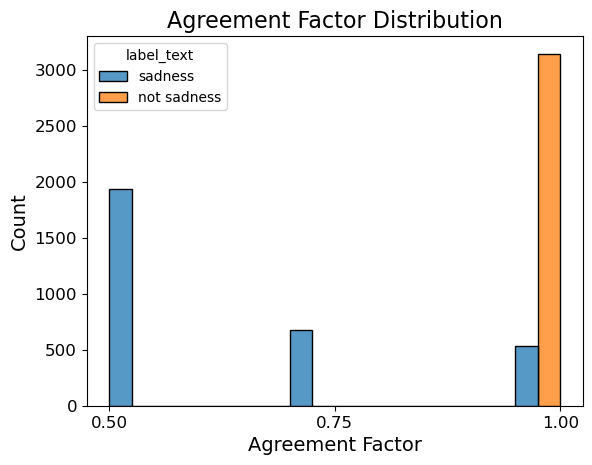

In [20]:
sns.histplot(data=cartography_df, x="agreement_factor_rd", hue='label_text', multiple='dodge', binwidth=0.05)
plt.title("Agreement Factor Distribution", fontsize=16)
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks([0.5, 0.75, 1.0], fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/agr_factor_hist.png", dpi=600, bbox_inches='tight')

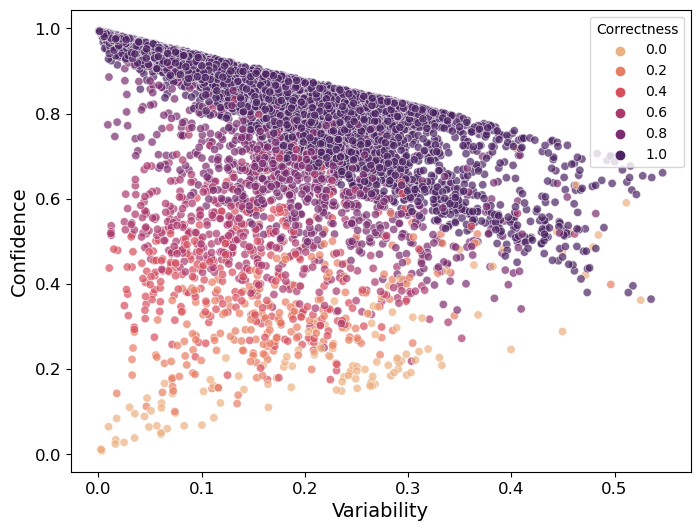

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='correctness', palette='flare', alpha=0.7)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Correctness', loc='upper right')
plt.savefig("./plots/conf_vs_var_color_correctness.png", dpi=600, bbox_inches='tight')

In [17]:
from scipy.stats import pearsonr

pearsonr(cartography_df['confidence'], cartography_df['agreement_factor_rd'])

PearsonRResult(statistic=0.21608114926640815, pvalue=2.8882317970661118e-67)

In [18]:
pearsonr(cartography_df[cartography_df['label']==1]['confidence'], cartography_df[cartography_df['label']==1]['agreement_factor_rd'])

PearsonRResult(statistic=0.4692491836820292, pvalue=8.991813675498844e-172)